# 4-bit Adder

In [1]:
from qiskit import *
import numpy as np
from math import pi, sqrt
import random

In [2]:
backend = Aer.get_backend('statevector_simulator')
def getBloch(quantumCircuit):
    return visualization.plot_bloch_multivector(execute(quantumCircuit, backend).result().get_statevector())

In [20]:
def stateGenerator(state):
    state = state[::-1]
    current = int(state, 2)
#     print('Current state: ', current)
    newState = [0 for i in range(0, 2**(len(state)))]
    newState[current] = 1
#     print('Init state array: ',newState)
    return newState

In [4]:
def getMeasure(quantumCircuit, n):
    measures = []
    for i in range(0,n):
        outcome = execute(quantumCircuit, backend).result()
        hist = outcome.get_counts()
        for i in hist.keys():
            measures.append(i)
        return measures

In [5]:
def makeCirc(n, m):
    initState = ''
    for i in range(0, n-m):
        initState += str(random.randint(0, 1))
    for i in range(0, m):
        initState += str(0)
    print(initState)
    qr = QuantumRegister(n)
    qc = ClassicalRegister(n)
    circ = QuantumCircuit(qr, qc)
    initializedState = stateGenerator(initState)
    circ.initialize(initializedState, qr)
    return circ

In [6]:
circ = makeCirc(4, 1)

1000
Current state:  1
Init state array:  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [7]:
circ.csx(1, 3)
circ.cx(0, 1)
circ.csx(2, 3)
circ.csx(0, 3)
circ.cx(1, 2)
circ.crx(-pi/2, 2, 3)

for i in range(0, 4):
    circ.measure(i, i)

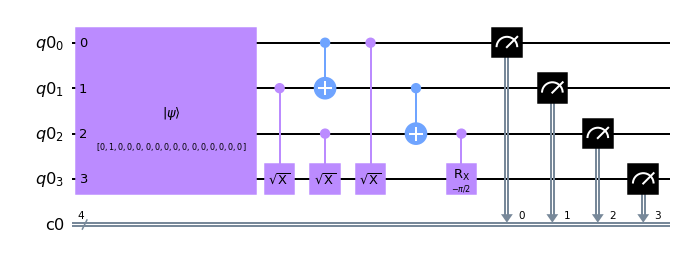

In [8]:
circ.draw();

In [9]:
getMeasure(circ, 1)[0][::-1]

'1110'

In [10]:
circ = QuantumCircuit(4)
circ.csx(1, 3)
circ.cx(0, 1)
circ.csx(2, 3)
circ.csx(0, 3)
circ.cx(1, 2)
circ.crx(-pi/2, 2, 3)

In [11]:
fullAdder = circ.to_gate(label=' Adder')

In [12]:
circ2 = QuantumCircuit(8)
circ2.append(fullAdder, [0, 1, 2, 3])

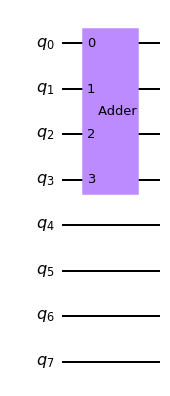

In [13]:
circ2.draw();

In [15]:
# Reverse bit
a = '01101'
a[::-1]

'10110'

In [40]:
def fourAdder(a1, a2):
    qubits = len(a1) + len(a2) + 5
    qr = QuantumRegister(qubits)
    cr = ClassicalRegister(qubits)
    circuit = QuantumCircuit(qr, cr)
    initializedState = stateGenerator(a1[::-1] + a2[::-1] + '00000')
    circuit.initialize(initializedState, qr)
    
    circuit.append(fullAdder, [0, 4, 8, 9])
    circuit.append(fullAdder, [1, 5, 9, 10])
    circuit.append(fullAdder, [2, 6, 10, 11])
    circuit.append(fullAdder, [3, 7, 11, 12])
    circuit.barrier()
    for i in range(0, qubits):
        circuit.measure(i, i)
    return circuit
    

In [41]:
a = '1111'
b = '0011'
# a+b = 0110 

In [42]:
circ = fourAdder(a, b)

In [43]:
getMeasure(circ, 1)[0][:5]

'10010'

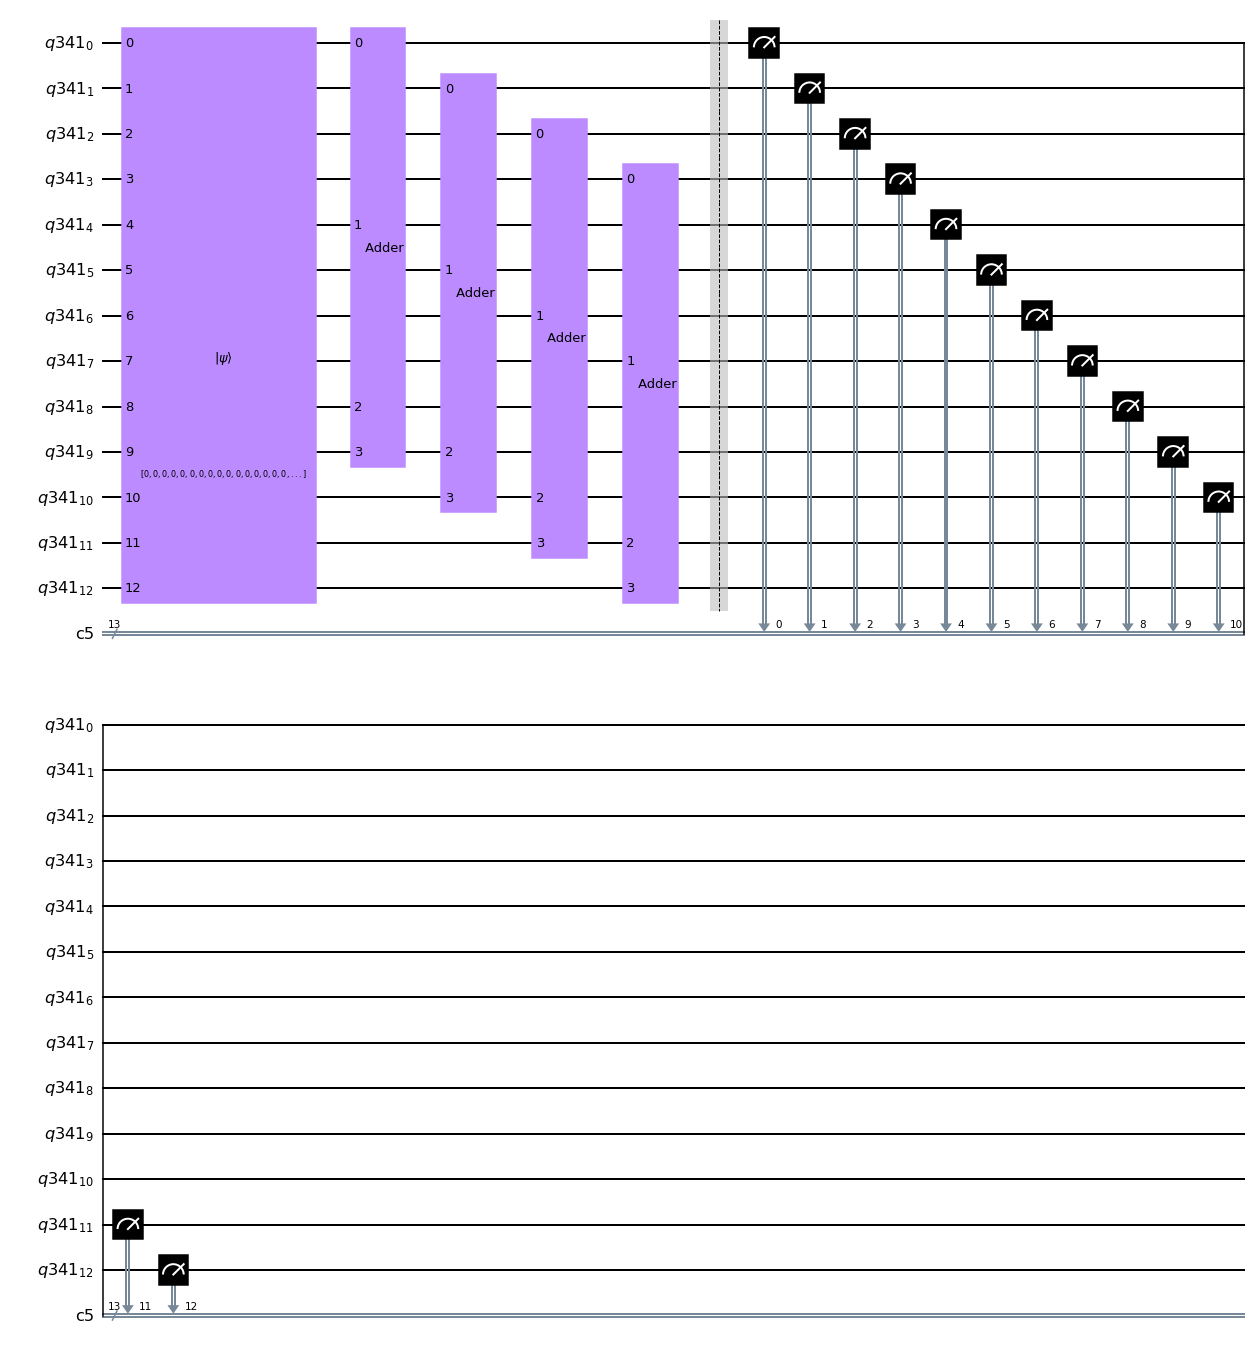

In [44]:
circ.draw();

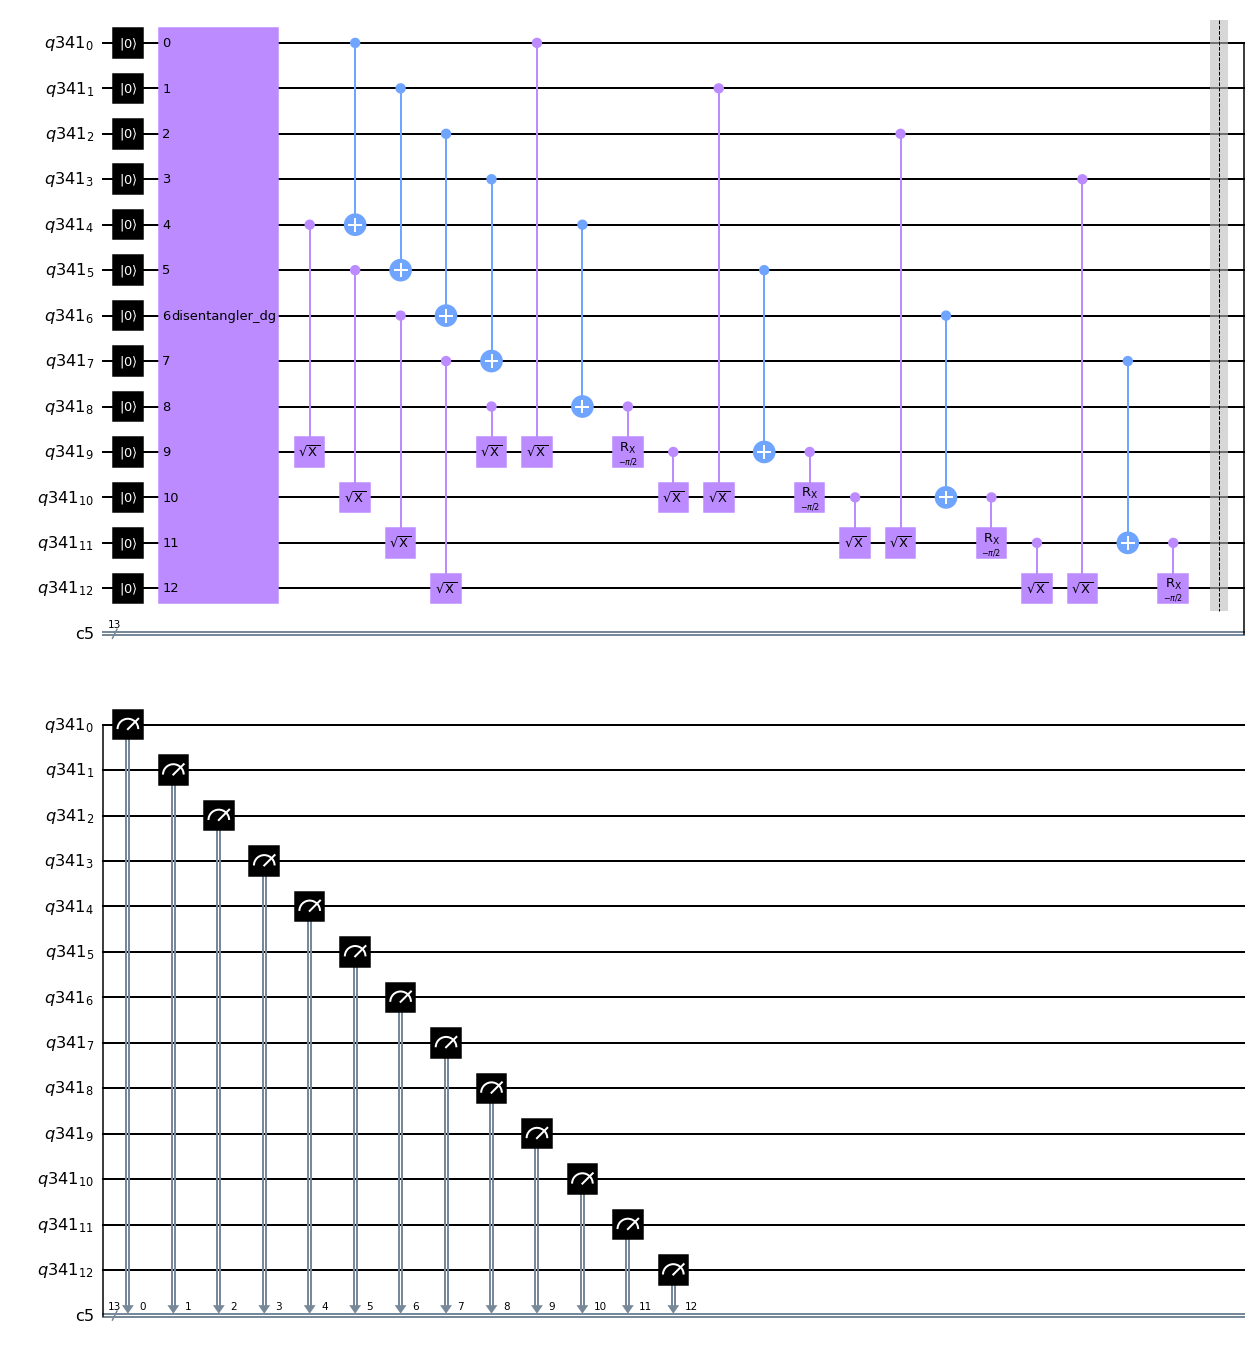

In [46]:
circ.decompose().draw();